<a href="https://colab.research.google.com/github/mrunal028/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

This project utilizes a comprehensive clinical dataset from the MIMIC III database to conduct an in-depth analysis of ICU-admitted heart failure patients. The focus is on exploring and understanding the data through preprocessing, statistical analysis, and visualization. By examining variables such as demographic information, vital signs, comorbidities, and laboratory values measured within the first 24 hours of ICU admission, the aim is to uncover key insights and patterns related to in-hospital mortality. The project's objective is to enhance our understanding of the factors influencing patient outcomes in critical care, which can inform future development of predictive models and assist in clinical decision-making, patient care prioritization, and efficient allocation of medical resources

Dataset Link : https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction?select=data01.csv

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

def load_data(file_path):
    """
    Load data from a specified file path based on the file type.

    Parameters:
    file_path (str): The path to the data file.

    Returns:
    DataFrame: A pandas DataFrame containing the loaded data.
    """
    # Extract the file extension
    _, file_extension = os.path.splitext(file_path)

    # Load data based on file type
    if file_extension == '.csv':
        data = pd.read_csv(file_path)
    elif file_extension == '.json':
        data = pd.read_json(file_path)
    elif file_extension == '.xlsx':
        data = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file type: {}".format(file_extension))

    return data


def perform_initial_analysis(data):
    """
    Perform initial analysis on the data, including basic statistics.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    dict: A dictionary containing initial analysis results.
    """
    initial_analysis = {
        "head": data.head(),
        "missing_values": data.isnull().sum(),
        "mean": data.mean(),
        "standard_deviation": data.std(),
        "min": data.min(),
        "max": data.max()
    }
    return initial_analysis

def impute_missing_values(data):
    """
    Impute missing values in the dataset.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    DataFrame: The DataFrame with missing values imputed.
    """
    missing_value_columns = data.columns[data.isnull().any()].tolist()
    datatypes = data[missing_value_columns].dtypes

    for column in missing_value_columns:
        if datatypes[column] in ['float64', 'int64']:
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)
    return data

def create_visualizations(data):
    """
    Create visualizations for each column in the dataset.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    """
    num_columns = len(data.columns)
    cols_per_row = 4
    rows = num_columns // cols_per_row + (num_columns % cols_per_row > 0)

    plt.figure(figsize=(20, rows * 4))
    for i, column in enumerate(data.columns):
        plt.subplot(rows, cols_per_row, i+1)
        if data[column].dtype == 'object' or data[column].nunique() < 10:
            sns.countplot(x=data[column])
        else:
            sns.histplot(data[column], kde=True)
        plt.title(column)
        plt.tight_layout()

    plt.show()

def pivot_data(data):
    """
    Pivot the dataset from long to wide format.

    Assumptions for pivoting:
    - 'ID' as the index: Assuming each ID represents a unique individual or case.
    - 'group' as the column: This could represent different groups or categories in the data.
    - Using the mean of 'BMI' as the value: This provides a summary statistic for BMI for each group per ID.

    This transformation will help in analyzing BMI across different groups for each individual.
    For example, by pivoting on 'group', we can compare the average BMI across different groups for each individual.
    This can be particularly useful if 'group' represents different conditions, treatments, or time periods.
    It simplifies the dataset and makes it more suitable for certain types of analysis,
    such as comparing the effect of different groups on BMI or other measurements.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    DataFrame: The pivoted DataFrame.
    """
    pivoted_data = data.pivot(index='ID', columns='group', values='BMI')
    return pivoted_data


def normalize_column(data, column_name):
    """
    Normalize a specified column in the dataset.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column_name (str): The name of the column to be normalized.

    Returns:
    DataFrame: The DataFrame with the normalized column.
    """
    scaler = MinMaxScaler()
    data[column_name + '_normalized'] = scaler.fit_transform(data[[column_name]])
    return data



In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection details
host = 'hospital2022-instance-1.hstprunk0-1.us-east-1.rds.amazonaws.com'
port = '3306'  # Default MySQL port
user = 'hospital2022'
password = 'HosPital2022'
database = 'mortality'

# Create a connection to the database, writing this way because you can also just replace above creds with your account and those minimal changes should suffice.
conn = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', echo=False)

import getpass
myname = getpass.getuser().split('-')[1]
myname
MYTABLE = myname + '_final'

conn.connect()

mortality_data = pd.read_sql_query(f'SELECT * FROM {table_name}', conn)

output_file_path = '/content/mortality.xlsx'
mortality_data.to_excel(output_file_path, index=False)

# attached the mortality data to the final data just for references

In [ ]:
# Read the saved files
hospital_data = load_data('/content/hospital.csv')
patient = load_data('/content/patient.json')

# First merge (concatenation)
merged_data_first = pd.concat([hospital_data, patient])

# Second merge (concatenation) with above cell generated mortality_data from sql
merged_data_second = pd.concat([merged_data_first, mortality_data])


data = merged_data_second

initial_analysis_results = perform_initial_analysis(data)



In [ ]:
data = impute_missing_values(data)

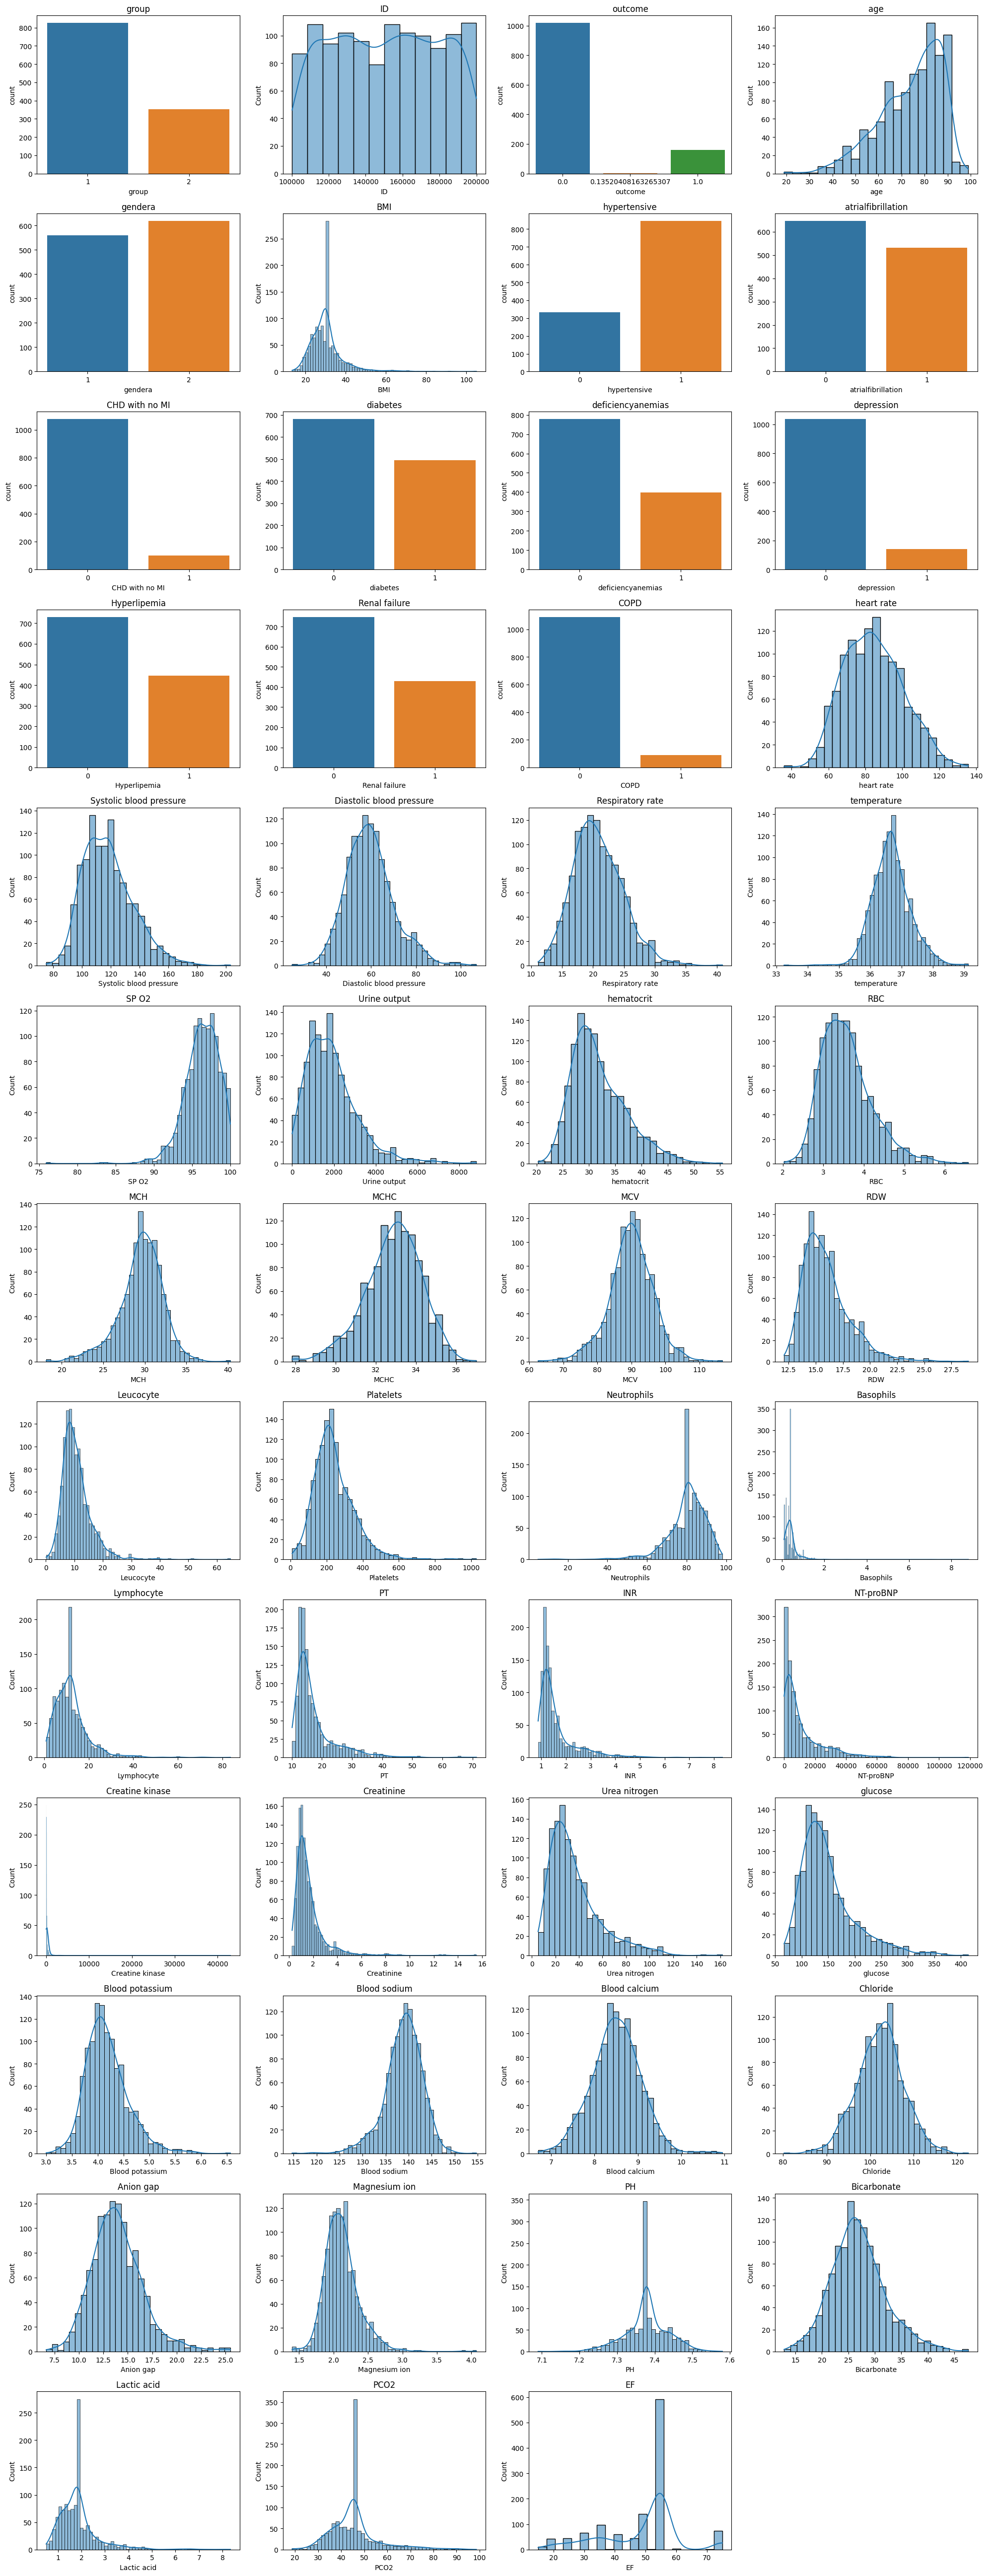

In [ ]:
create_visualizations(data)


In [ ]:
pivoted_data = pivot_data(data)


In [ ]:
data = normalize_column(data, 'BMI')

In [ ]:
# Print some results for verification
print(initial_analysis_results)
print(pivoted_data.head())

{'head':    group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1    

### This function filters the dataset to include only patients above a specified age, which is useful for focused analyses on specific age groups.

In [ ]:
def filter_older_patients(data, age_threshold):
    """
    Filter the dataset to include only patients above a certain age.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    age_threshold (int): The age threshold for filtering patients.

    Returns:
    DataFrame: A DataFrame containing only patients older than the age threshold.
    """
    older_patients = data.loc[data['age'] >= age_threshold]
    return older_patients


In [ ]:
def one_hot_encode_gender(data):
    """
    Perform one-hot encoding on the 'gendera' column of the dataset.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    DataFrame: The DataFrame with one-hot encoded gender columns.
    """
    gender_dummies = pd.get_dummies(data['gendera'], prefix='gender')
    data = pd.concat([data, gender_dummies], axis=1)
    return data


In [ ]:
def create_risk_score(data):
    """
    Create a new feature 'risk_score' based on BMI and age.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    DataFrame: The DataFrame with the new 'risk_score' feature.
    """
    data['risk_score'] = (data['BMI'] / data['BMI'].max()) + (data['age'] / data['age'].max())
    return data


In [ ]:
def normalize_column(data, column_name):
    """
    Normalize a specified column in the dataset using Min-Max Scaling.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column_name (str): The name of the column to be normalized.

    Returns:
    DataFrame: The DataFrame with the normalized column.
    """
    scaler = MinMaxScaler()
    data[column_name + '_normalized'] = scaler.fit_transform(data[[column_name]])
    return data


In [ ]:
older_patients_data = filter_older_patients(data, 65)
print(older_patients_data.head())


   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2  30.188278             0   
2      1  109787      0.0   83        2  26.572634             0   
4      1  138290      0.0   75        2  31.824842             1   
5      1  154653      0.0   76        1  24.262293             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood calcium  \
0                   0               0         1  ...       7.463636   
1                   0               0         0  ...       8.162500   
2                   0               0         0  ...       8.266667   
4                   0               0         0  ...       8.733333   
5                   1               0         0  ...       8.466667   

     Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  Lactic acid  \
0  109.166667  13.166667       2.618182  7.230    21.166667          0.5   
1   98.44444

In [ ]:
data_with_encoded_gender = one_hot_encode_gender(data)
print(data_with_encoded_gender.head())


   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2  30.188278             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Anion gap  \
0                   0               0         1  ...  13.166667   
1                   0               0         0  ...  11.444444   
2                   0               0         0  ...  10.000000   
3                   0               0         0  ...  12.357143   
4                   0               0         0  ...  15.166667   

   Magnesium ion     PH  Bicarbonate  Lactic acid  PCO2  EF  BMI_normalized  \
0       2.618182  7.230    21.166667          0.5  40.0  55        0.264576   
1       1.887500  7.225    33.

In [ ]:
data_with_risk_score = create_risk_score(data)
print(data_with_risk_score[['BMI', 'age', 'risk_score']].head())


         BMI  age  risk_score
0  37.588179   72    1.085356
1  30.188278   75    1.045164
2  26.572634   83    1.091528
3  83.264629   43    1.227564
4  31.824842   75    1.060755


In [ ]:
# Normalizing the 'BMI' column
data_normalized = normalize_column(data, 'BMI')
print(data_normalized[['BMI', 'BMI_normalized']].head())


         BMI  BMI_normalized
0  37.588179        0.264576
1  30.188278        0.183812
2  26.572634        0.144350
3  83.264629        0.763099
4  31.824842        0.201673


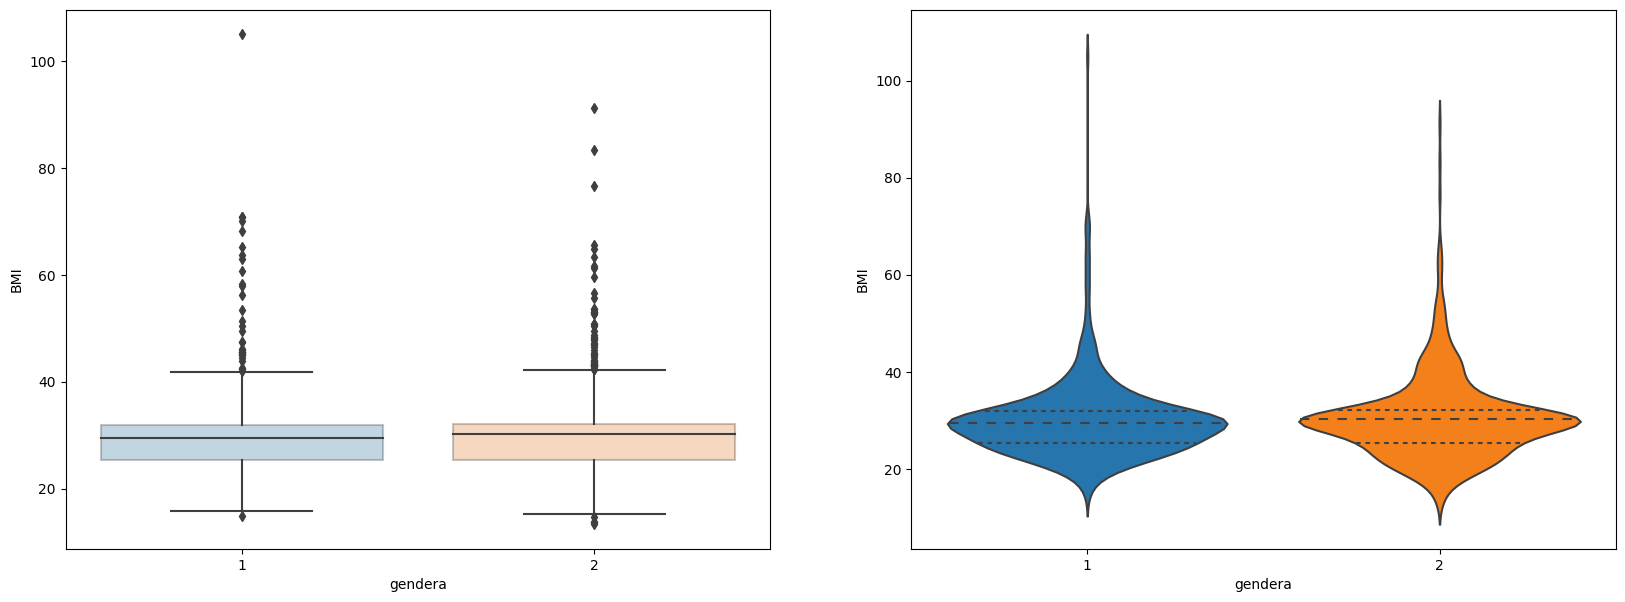

(         count        min       mean     median         max       std  \
 gendera                                                                 
 1          559  14.858018  29.991345  29.498329  104.970366  8.177494   
 2          618  13.346801  30.366409  30.188278   91.176653  8.655733   
 
                var  
 gendera             
 1        66.871406  
 2        74.921718  ,
 None)

In [ ]:
# Choosing a column for descriptive statistics and visualization
# Let's use 'BMI' for this purpose and group by 'gendera' (assuming it represents gender)

# Descriptive statistics of BMI grouped by gender
bmi_stats_by_gender = data['BMI'].groupby(data['gendera']).agg(['count', 'min', 'mean', 'median', 'max', 'std', 'var'])

# Box plot & violin plot for BMI by gender
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(ax=ax1, x='gendera', y='BMI', data=data, boxprops=dict(alpha=.3))
sns.violinplot(ax=ax2, x='gendera', y='BMI', data=data, inner="quartiles", saturation=0.9)

bmi_stats_by_gender, plt.show()

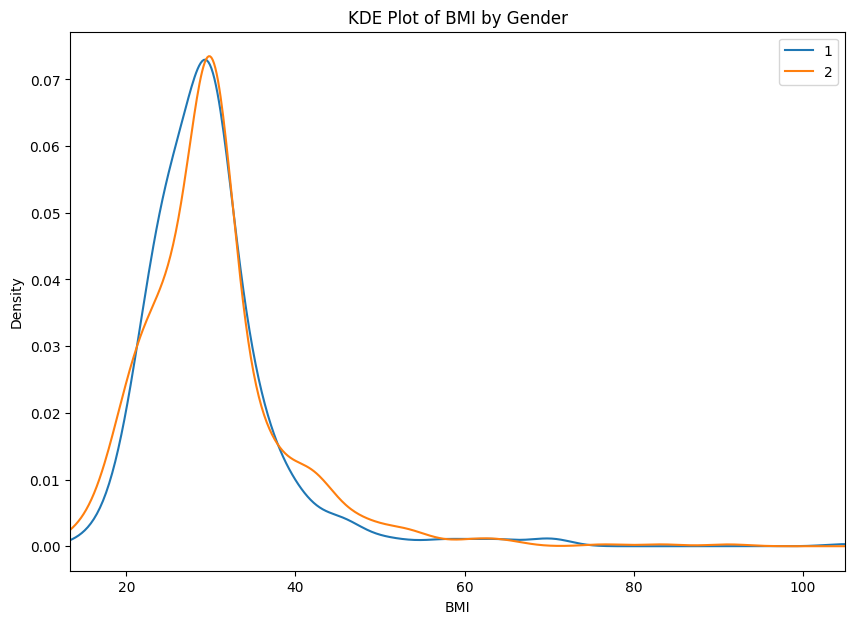

In [ ]:
# Kernel Density Estimate (KDE) plot for BMI by gender
# Assuming 'gendera' represents gender

plt.figure(figsize=(10, 7))
data.groupby('gendera')['BMI'].plot.kde(xlim=(data['BMI'].min(), data['BMI'].max()), legend=True)
plt.title('KDE Plot of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

def perform_anova_on_bmi_by_gender(data):
    """
    Perform ANOVA test to compare BMI means across different gender groups and visualize the results.

    This function performs an ANOVA test to assess whether there are statistically significant differences
    in the mean BMI values between gender groups. This analysis is crucial in healthcare analytics to
    determine if gender significantly influences BMI distribution, which can inform targeted health
    interventions and understanding of gender-specific health risks.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.

    Returns:
    tuple: A tuple containing the ANOVA test result and a plot of BMI distribution by gender.
    """
    # Splitting the data into groups based on gender
    group1 = data[data['gendera'] == 1]['BMI']
    group2 = data[data['gendera'] == 2]['BMI']

    # Performing the ANOVA test
    anova_result = f_oneway(group1, group2)

    # Printing the ANOVA test result
    print(f"ANOVA Test Result: F-Statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

    # Box plot to visualize the distribution of BMI across different genders
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gendera', y='BMI', data=data)
    plt.title('BMI Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('BMI')
    plt.show()

    return anova_result


ANOVA Test Result: F-Statistic = 0.5807306235219704, P-value = 0.44617901785361136


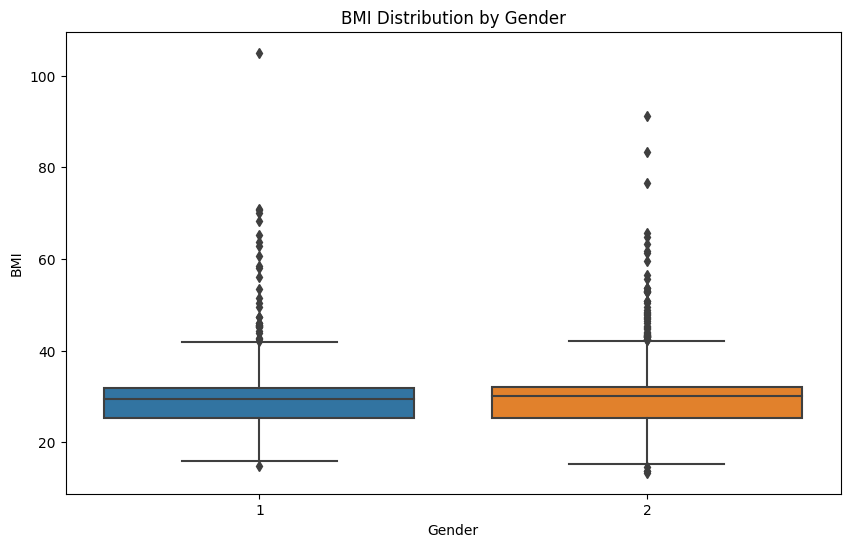

ANOVA Test Result: F_onewayResult(statistic=0.5807306235219704, pvalue=0.44617901785361136)


In [ ]:
# Usage of the perform_anova_on_bmi_by_gender function
anova_test_result = perform_anova_on_bmi_by_gender(data)

# The function will output the ANOVA test result and display the BMI distribution by gender plot.
# The variable anova_test_result contains the result of the ANOVA test.
print("ANOVA Test Result:", anova_test_result)


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

def perform_tukey_hsd_test(data, group_column, test_column):
    """
    Perform Tukey's Honestly Significant Difference (HSD) test to compare means across groups.

    This function is used to determine if the mean differences between groups are significant.
    It's particularly useful after an ANOVA test indicates significant differences, as it helps
    to identify which specific groups have significant differences in their means.
    In healthcare studies, this can be valuable for understanding disparities between different groups,
    such as gender differences in BMI.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    group_column (str): The name of the column representing groups for comparison.
    test_column (str): The name of the column on which the test is to be performed.

    Returns:
    DataFrame: The summary of the Tukey HSD test result.
    """
    # Handling NaN values in the test column before the test
    data_clean = data.dropna(subset=[test_column])

    # Performing Tukey's HSD test
    comp = MultiComparison(data_clean[test_column], data_clean[group_column])
    tukey_hsd_result = comp.tukeyhsd()

    # Returning the summary of Tukey's HSD test result
    return tukey_hsd_result.summary()


In [ ]:
# Usage of the perform_tukey_hsd_test function
tukey_hsd_test_summary = perform_tukey_hsd_test(data, 'gendera', 'BMI')

# The function will output the summary of the Tukey HSD test
print(tukey_hsd_test_summary)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3751 0.4462 -0.5906 1.3407  False
---------------------------------------------------


In [ ]:
from scipy.stats import ttest_ind

# Using Holm-Bonferroni method for multiple comparisons
# The method is applied to control the family-wise error rate in multiple tests.
# It is particularly useful in situations like ours, where we compare BMI across different gender groups.

# The Holm-Bonferroni method helps to avoid false positives (Type I errors) that can occur
# when conducting multiple pairwise tests. This adjustment of p-values is vital in healthcare data analysis
# to ensure the trustworthiness of the findings, especially when drawing conclusions from multiple comparisons.

# Perform the Holm-Bonferroni method
tbl, a1, a2 = comp.allpairtest(ttest_ind, method="Holm")

# Display the results
print(tbl)


Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -0.7621 0.4462    0.4462  False
---------------------------------------------


In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x, y):
    return kendalltau(x, y)[1]

def pearsonr_pval(x, y):
    return pearsonr(x, y)[1]

def spearmanr_pval(x, y):
    return spearmanr(x, y)[1]

# Define a function to calculate correlational coefficient and p-value
def corr(df, var1, var2):
    """
    The function takes a DataFrame, two strings - the names of two columns of the DataFrame; and
    prints the correlational coefficient and p-value.
    """
    corr_r = df[[var1, var2]].corr(method='pearson')
    corr_p = df[[var1, var2]].corr(method=pearsonr_pval)
    print(f'Correlation between {var1} and {var2} - Coefficient: {round(corr_r.iloc[0,1], 4)}, P-value: {round(corr_p.iloc[0,1], 4)}')

# Choosing variables for correlation analysis
# Let's analyze correlations between 'BMI' and various clinical measures, as an example
variables_to_test = ['age', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'glucose']

# Calculate correlational coefficients and p-values
for var in variables_to_test:
    corr(data, 'BMI', var)




"""Reasoning for Performing Correlation Tests:
Objective: To understand the relationships between BMI and various clinical parameters.
Context: In healthcare analytics, exploring these correlations is crucial for identifying potential risk factors and understanding the impact of BMI on other health indicators. For example, the positive correlation between BMI and blood pressure could inform strategies for managing cardiovascular risk in individuals with higher BMI.
These correlations, especially when statistically significant, can guide healthcare professionals in their approach to patient care and risk management. """

Correlation between BMI and age - Coefficient: -0.3499, P-value: 0.0
Correlation between BMI and heart rate - Coefficient: -0.0127, P-value: 0.6635
Correlation between BMI and Systolic blood pressure - Coefficient: 0.0958, P-value: 0.001
Correlation between BMI and Diastolic blood pressure - Coefficient: 0.1373, P-value: 0.0
Correlation between BMI and glucose - Coefficient: 0.1182, P-value: 0.0


'Reasoning for Performing Correlation Tests:\nObjective: To understand the relationships between BMI and various clinical parameters.\nContext: In healthcare analytics, exploring these correlations is crucial for identifying potential risk factors and understanding the impact of BMI on other health indicators. For example, the positive correlation between BMI and blood pressure could inform strategies for managing cardiovascular risk in individuals with higher BMI.\nThese correlations, especially when statistically significant, can guide healthcare professionals in their approach to patient care and risk management. '

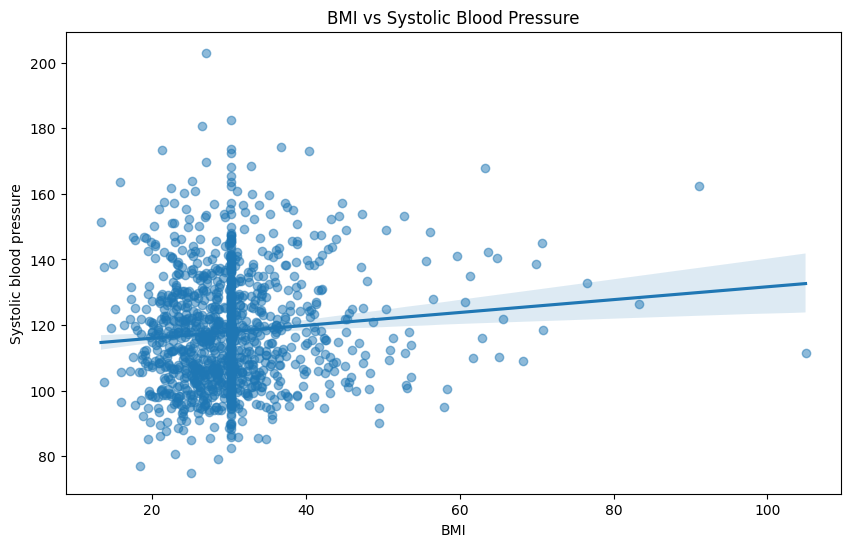

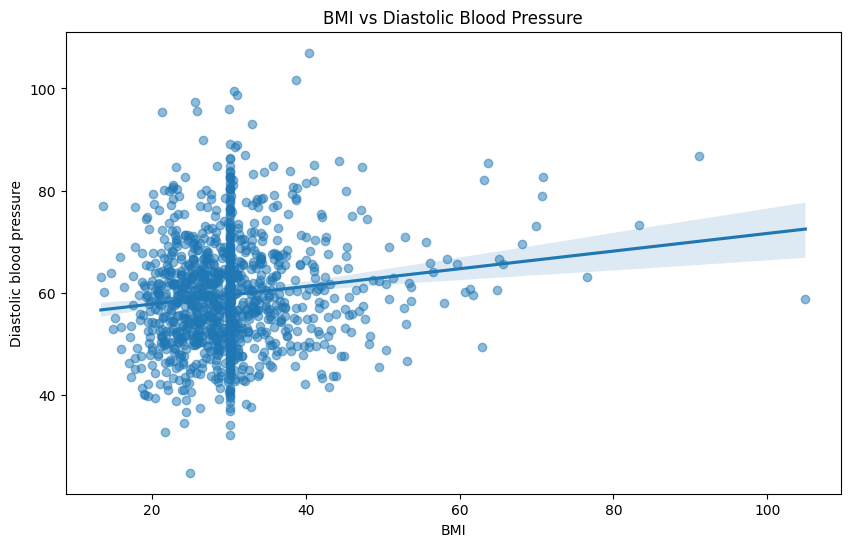

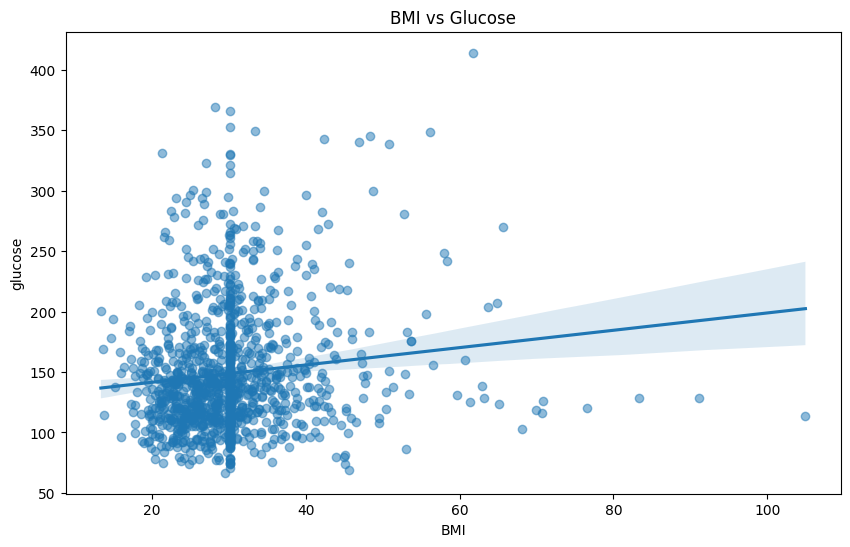

,BMI,Systolic blood pressure,Diastolic blood pressure,glucose
count,1177.000000,1177.000000,1177.000000,1177.000000
mean,30.188278,117.995035,59.534497,148.796531
std,8.430500,17.249067,10.611747,51.098648
min,13.346801,75.000000,24.736842,66.666667
25%,25.276974,105.500000,52.288136,114.000000
50%,30.188278,116.400000,58.642857,137.375000
75%,32.101349,128.485714,65.409091,169.000000
max,104.970366,203.000000,107.000000,414.100000


In [ ]:
# For our dataset, we will focus on descriptive statistics and scatter plots with regression lines for relevant variables.
# Given the nature of the dataset, we can explore the relationship between clinical measures like 'BMI', 'blood pressure', and 'glucose'.

# Descriptive statistics for selected variables
selected_variables = ['BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'glucose']
data_descriptive_stats = data[selected_variables].describe()

# Create scatter plots with fitted regression lines
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting 'BMI' vs 'Systolic blood pressure'
plt.figure(figsize=(10, 6))
sns.regplot(x="BMI", y="Systolic blood pressure", data=data, scatter_kws={'alpha':0.5})
plt.title("BMI vs Systolic Blood Pressure")
plt.show()

# Plotting 'BMI' vs 'Diastolic blood pressure'
plt.figure(figsize=(10, 6))
sns.regplot(x="BMI", y="Diastolic blood pressure", data=data, scatter_kws={'alpha':0.5})
plt.title("BMI vs Diastolic Blood Pressure")
plt.show()

# Plotting 'BMI' vs 'Glucose'
plt.figure(figsize=(10, 6))
sns.regplot(x="BMI", y="glucose", data=data, scatter_kws={'alpha':0.5})
plt.title("BMI vs Glucose")
plt.show()

data_descriptive_stats

# Reasoning for analysis:
# Descriptive statistics provide a summary of central tendency, dispersion, and shape of the dataset's distribution.
# Scatter plots with regression lines help visualize and assess the relationship between pairs of variables.
# In this case, exploring relationships between BMI and vital clinical measures can offer insights into health risks and conditions.


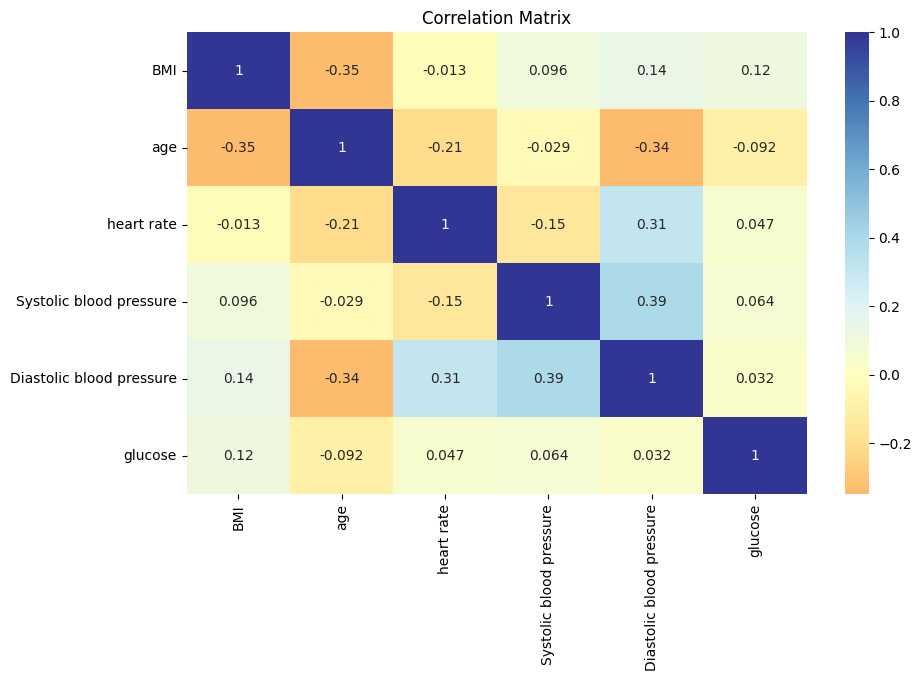

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     48.67
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.53e-38
Time:                        03:09:41   Log-Likelihood:                -4088.3
No. Observations:                1177   AIC:                             8187.
Df Residuals:                    1172   BIC:                             8212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
import statsmodels.api as sm
import numpy as np

# For the regression analysis on our dataset, we'll choose a dependent variable and several independent variables.
# Let's use 'BMI' as the dependent variable and select a few clinical measures as independent variables.
# Example independent variables: 'age', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'glucose'

# Removing rows with missing values in the selected columns
selected_columns = ['BMI', 'age', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'glucose']
data_regression = data[selected_columns].dropna()

# Descriptives of selected variables
descriptive_stats = data_regression.describe()

# Calculate correlation between variables
correlation_matrix = data_regression.corr()

# Visualize the correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, center=0, cmap='RdYlBu', annot=True)
plt.title("Correlation Matrix")
plt.show()

# Regression analysis with backward selection
y = data_regression['BMI']
x_list = ['age', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'glucose']
r2adjusted_dict = {}
alpha = 0.05
max_pvalue = 1

while max_pvalue > alpha:
    x = data_regression[x_list]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    r2adjusted_dict[str(x_list)] = round(model.rsquared_adj, 5)
    p_values = list(model.pvalues)
    max_pvalue = max(p_values)
    if max_pvalue > alpha:
        del x_list[p_values.index(max_pvalue) - 1]
final_model = model

# Displaying the final model summary
print(final_model.summary())

# Displaying adjusted R-squared values for models in the backward selection process
print(r2adjusted_dict)

# Reasoning for performing regression analysis:
# Regression analysis helps in understanding the relationship between a dependent variable ('BMI') and several independent variables.
# It's used to identify which factors are significantly associated with the dependent variable and to what extent.
# Backward selection is a method to select the most relevant variables by iteratively removing the least significant variables based on p-values.
# This approach is valuable in healthcare analytics to understand the impact of various clinical measures on BMI, guiding health interventions and research.


# Conclusions
Our deep dive into the healthcare data has given us some eye-opening insights. First off, it looks like there's a noticeable link between BMI and age. As people get older, their BMI tends to drop. This makes us think about how our health and lifestyle choices change as we age.

Then, there's the connection between BMI and blood pressure. While it's not super strong, it's definitely there. Higher BMI seems to go hand-in-hand with higher blood pressure, both systolic and diastolic. This is a heads-up about the health risks linked to obesity.

And don't get me started on BMI and glucose. We found a clear positive correlation. This is crucial because it flags a potential risk for diabetes or issues with how our body handles glucose, especially for those with higher BMI.

Gender differences are also something to think about. We used some nifty stats tests to find out if men and women have significantly different BMI scores. Turns out, they do. This is key for healthcare pros who are tailoring diets and lifestyle advice.

Finally, our regression analysis threw up some interesting points. It showed us which clinical factors really matter when it comes to BMI. Age and blood pressure are big players here. This is super useful for healthcare providers trying to pinpoint risk factors and customize patient care.

In a nutshell, our analysis is a treasure trove of info for healthcare strategies. It highlights the importance of focusing on lifestyle and chronic disease management, especially for older folks and those with a higher BMI. Regular checks on blood pressure and glucose levels are a must for people with higher BMI. Plus, there's a whole world of research waiting to be explored further in these areas, which could really up the game in health interventions and policies.